In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os

In [2]:
df = pd.read_csv('bank-full.csv')


In [4]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       45211 non-null  int32 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [6]:
df.head(5)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [9]:
df.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.groupby('y').mean()


,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


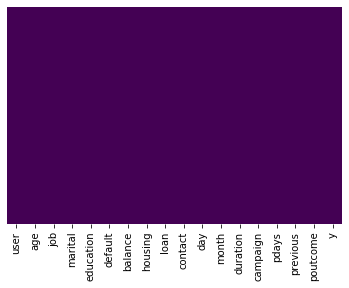

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [15]:
df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
#Define X and y
X = df.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

In [20]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [21]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

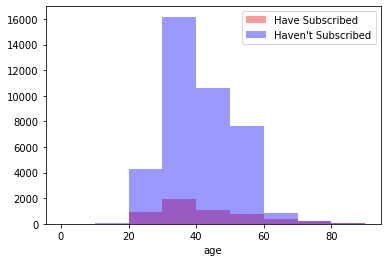

In [22]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()